# 数据准备

In [36]:
import os
import shutil
from glob2 import glob
import numpy as np
import re
import matplotlib.pyplot as plt

In [49]:
outliner = [
    'cat.10029','cat.10712','cat.11184','cat.12272',
    'cat.4338','cat.4688','cat.5351',
    'cat.7377','cat.7564','cat.8456','cat.9171',
    'cat.9770','dog.10161','dog.10237','dog.10401',
    'dog.1043','dog.10747','dog.10797','dog.11299',
    'dog.1259','dog.1308','dog.1773','dog.1895',
    'dog.2422','dog.2614','dog.2877','dog.4367',
    'dog.5604','dog.6028','dog.6475','dog.7076',
    'dog.7604','dog.8736','dog.8898','dog.9188',
    'dog.9517','dog.7997','dog.7164','dog.11731',
    'dog.7413','dog.10801','dog.6405',
    'cat.3219','cat.9250','cat.2893','cat.6987',
    'cat.10121','cat.9882','cat.11724','cat.335',
    'cat.5355','cat.11399','cat.4190','cat.4085',
    'cat.5583','cat.2150','cat.10570','cat.10266',
    'cat.372','cat.7599','cat.9331','cat.12326',
    'cat.12227','cat.5794','cat.3822','cat.11297',
    'cat.3731','cat.9695','cat.10220','cat.10863',
    'cat.26','cat.2040','cat.724','cat.2337',
    'cat.2457','cat.9513','cat.883','cat.6',
    'cat.11222','cat.9596','cat.4986','cat.7920','cat.9444'
]

outliner = [name+'.jpg' for name in outliner]

In [52]:
len(outliner)

83

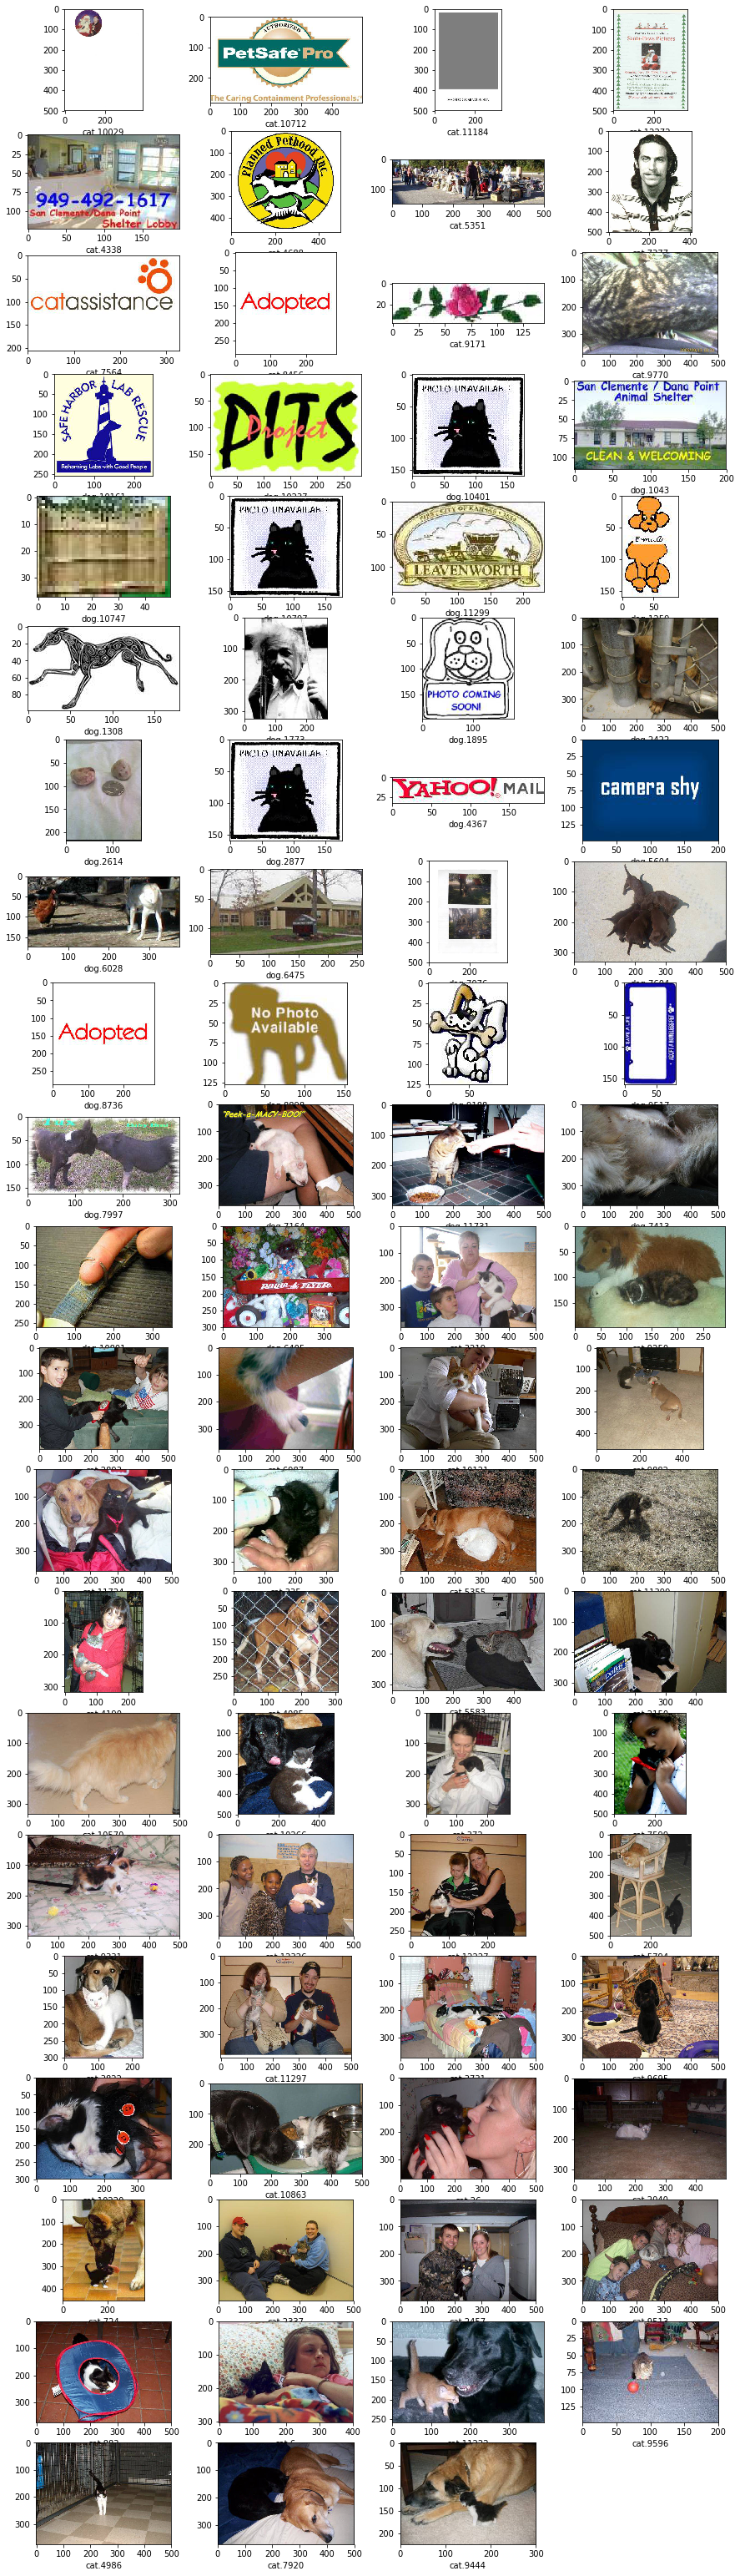

In [47]:
fig = plt.figure(figsize=(15,80))
for i,fname in enumerate(outliner):
    path = 'train/{}.jpg'.format(fname)
    sub_img = fig.add_subplot(30,4,1+i)
    plt.xlabel(fname)
    sub_img.imshow(plt.imread(path))
plt.show()

In [53]:
if 'data' not in os.listdir():
    os.mkdir('data/')
    os.mkdir('data/train')
    os.mkdir('data/train/cat')    
    os.mkdir('data/train/dog')    
    os.mkdir('data/test')    
    os.mkdir('data/test/test')  
    
for path in glob('train/*'):
    filename = path.split('/')[-1]
    if filename not in outliner:
        if 'cat' in filename:
            shutil.move(path, 'data/train/cat/')
        else:
            shutil.move(path, 'data/train/dog/')

for path in glob('test/*.jpg'):
    shutil.move(path, 'data/test/test/')

    


In [54]:
cap = re.compile('[A-Z]')

for path in glob('images/*.jpg'):
    if len(cap.findall(path)):
        shutil.move(path, 'data/train/cat/')
    else:
        shutil.move(path, 'data/train/dog/')
    


# 特征提取

In [56]:
from keras.applications import *
from keras.preprocessing import image
from keras.models import Model
from keras.layers.pooling import GlobalAveragePooling2D
import h5py

/home/kevin/Documents/anaconda3/envs/tf/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/kevin/Documents/anaconda3/envs/tf/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [57]:
# 加载预训练模型
model_xception = Xception(weights='imagenet',include_top=False)
model_resnet50 = ResNet50(weights='imagenet',include_top=False)
model_vgg16 = VGG16(weights='imagenet',include_top=False)
model_inceptionv3 = InceptionV3(weights='imagenet', include_top=False)
model_incresnet = InceptionResNetV2(weights='imagenet', include_top=False)
model_dense = DenseNet169(weights='imagenet', include_top=False)

In [58]:
# 通用图片特征提取器
def get_bottleneck_feature(pretrain_model,model_name, datagen, img_size):
    train_generator = datagen.flow_from_directory(
            'data/train',
            target_size=img_size,
            batch_size=50,
            shuffle=False,
            class_mode='binary')
    
    test_generator = datagen.flow_from_directory(
            'data/test',
            target_size=img_size,
            batch_size=50,
            shuffle=False,
            class_mode=None)

    model = Model(pretrain_model.input, GlobalAveragePooling2D()(pretrain_model.output))
    
    train_data = model.predict_generator(train_generator, 647)
    test_data = model.predict_generator(test_generator, 250)
    with h5py.File("gap_{}.h5".format(model_name)) as h:
        h.create_dataset('train',data=train_data)
        h.create_dataset('label_train',data=train_generator.classes)
        h.create_dataset('test',data=test_data)

In [59]:
# 提取图片特征
get_bottleneck_feature(model_xception,'xception',image.ImageDataGenerator(preprocessing_function=xception.preprocess_input),(299,299))
print('done')
get_bottleneck_feature(model_resnet50,'resnet50',image.ImageDataGenerator(preprocessing_function=resnet50.preprocess_input),(224,224))
print('done')
get_bottleneck_feature(model_vgg16,'vgg16',image.ImageDataGenerator(preprocessing_function=vgg16.preprocess_input),(224,224))
print('done')
get_bottleneck_feature(model_inceptionv3,'inception',image.ImageDataGenerator(preprocessing_function=inception_v3.preprocess_input),(299,299))
print('done')
get_bottleneck_feature(model_incresnet,'inception_resnet',image.ImageDataGenerator(preprocessing_function=inception_resnet_v2.preprocess_input),(299,299))
print('done')
get_bottleneck_feature(model_dense,'densenet',image.ImageDataGenerator(preprocessing_function=densenet.preprocess_input),(224,224))
print('done')


Found 32307 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.
done
Found 32307 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.
done
Found 32307 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.
done
Found 32307 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.
done
Found 32307 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.
done
Found 32307 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.
done
